# 10 - The Finite Square Well

In class, we found the even energy eigenstates,
$$
\phi_\text{even}(x) = \begin{cases}
Ae^{qx}, & \text{if } x<-a \\
D \cos kx , & \text{if } -a < x < a \\
Ae^{-qx}, & \text{if } x>a
\end{cases}
$$
and for homework I'll ask you to find the odd ones, which are
$$
\phi_\text{odd}(x) = \begin{cases}
Ae^{qx}, & \text{if } x<-a \\
C \sin kx , & \text{if } -a < x < a \\
-Ae^{-qx}, & \text{if } x>a.
\end{cases}
$$
By fitting the boundary conditions, we were left with a transcental energy condition for the even states,
$$
k \tan ka = q,
$$
and again for homework you found the one for the odd states,
$$
-ka \cot ka = qa.
$$

Solving them requires numerical work, and we might as well plot the wave functions while we're here.

First, define new dimensionless variables
$$
z = ka = \sqrt{2mEa^2}/\hbar,
$$
which is a scaled energy, and
$$
z_0 = \sqrt{2mV_0 a^2} / \hbar,
$$
which characterizes the "strength" of the well.  It turns out that the energy conditions can then be written as
$$
z \tan z = \sqrt{z_0^2 - z^2} \quad \text{and} \quad -z \cot z = \sqrt{z_0^2 - z^2}.
$$
These equations are more amenable to numerical solution, and we'll do it graphically first.

Suppose for our example here that $z_0 = 6$.  If we plot the left-hand side against the right-hand side for the above even and odd conditions, where they cross will be the solutions $z_n$:

/tmp/ipykernel_52309/773986270.py:13: RuntimeWarning: invalid value encountered in sqrt
  rhs = np.sqrt(z0**2 - z**2)


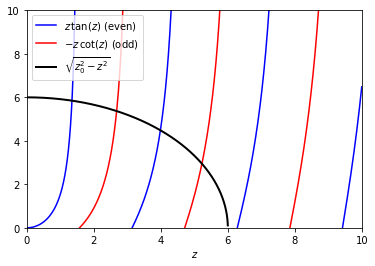

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z0 = 6
z = np.linspace(1e-3, 10, 10000)
lhs_even = z * np.tan(z)
# this will get rid of the vertical line connecting the point where tan(z) goes from
# +infinity to -infinty
lhs_even[lhs_even<0] = np.nan  
lhs_odd = -z / np.tan(z)
# same here
lhs_odd[lhs_odd < 0] = np.nan
rhs = np.sqrt(z0**2 - z**2)

plt.plot(z, lhs_even, color="blue", label=r"$z \, \tan(z)$ (even)")
plt.plot(z, lhs_odd, color="red", label=r"$-z \, \cot(z)$ (odd)")
plt.plot(z, rhs, color="black", lw=2, label=r"$\sqrt{z_0^2 - z^2}$")

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel("$z$")
plt.legend()


In this case, you can see that there are two even solutions (blue intersections) and two odd solutions (red), making a total of four bound states.  It's not easy to read the values of $z_n$ from the plot, though, so we should do proper solutions; we can do that with SciPy's fsolve function.  It will find the roots of the provided equation, but be careful: it will need a starting estimate as well, so we have to guess at the roots first.  That's where the above plot comes in handy.

In [24]:
from scipy.optimize import fsolve

def feven(z):
    return z * np.tan(z) - np.sqrt(z0**2 - z**2) 

def fodd(z):
    return -z / np.tan(z) - np.sqrt(z0**2 - z**2)

root_even = fsolve(feven, [1.5, 4])
print(f"The even roots are at z = {root_even}")
root_odd = fsolve(fodd, [2.5, 5])
print(f"The odd roots are at z = {root_odd}")

# let's make a sorted list of all roots, and compute the allowed energies
roots = np.sort(np.append(root_even, root_odd))
energies = roots**2 
print(f"The allowed energies are En = {energies} hbar^2/2ma^2")

The even roots are at z = [1.34475105 3.98582621]
The odd roots are at z = [2.67878311 5.22596353]
The allowed energies are En = [ 1.80835537  7.17587894 15.88681055 27.31069482] hbar^2/2ma^2


Finally we're ready to plot the associated energy eigenstates.  The functions are given above, but we have to be careful of whether $n$ is even or odd to plot the correct shape; plus everything is piecewise.  Here we go:

(-2.2, 2.2, 0.4662789168581063, 29.991960974845206)

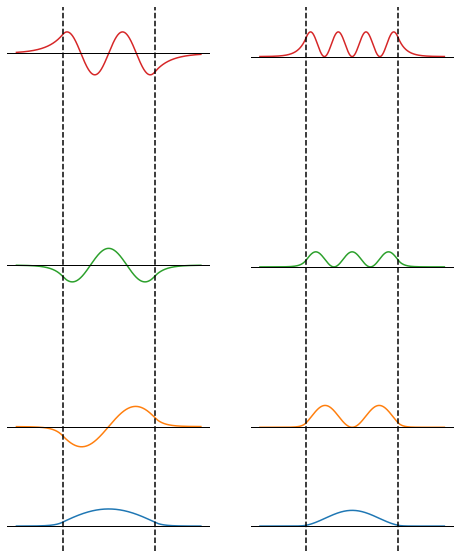

In [35]:
# set hbar = m = a = 1
def phi(x, n):
    
    a = 1
    
    z = roots[n-1]
    q = a * np.sqrt(z0**2 - z**2)
    
    if n % 2:  # even
        
        A = np.exp(q*a) * np.cos(z) / np.sqrt(a + 1/q)
        D = A * np.exp(-q*a) / np.cos(z)
        
        if x < -a:
            return A * np.exp(q*x)
        if x > a:
            return A * np.exp(-q*x)
        else:
            return D * np.cos(z*x / a)
    else:
        
        A = np.exp(q*a) * np.sin(z)  * np.sqrt(1 + 1/q)
        D = A * np.exp(-q*a) / np.sin(z)
        
        if x < -a:
            return -A * np.exp(q*x)
        if x > a:
            return A * np.exp(-q*x)
        else:
            return D * np.sin(z*x / a)    

fig = plt.figure(figsize=(8, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
x = np.linspace(-2, 2, 1000)
for n in range(1, 5):
    f = np.zeros(len(x))
    for i in range(len(x)):
        f[i] = phi(x[i], n)
    ax1.plot(x, f + energies[n-1])
    ax1.axhline(energies[n-1], color="black", lw=1)
    ax2.plot(x, np.abs(f)**2 + energies[n-1])
    ax2.axhline(energies[n-1], color="black", lw=1)
    
ax1.axvline(-1, color="black", ls="--")
ax1.axvline(1, color="black", ls="--")
ax1.axis('off')
ax2.axvline(-1, color="black", ls="--")
ax2.axvline(1, color="black", ls="--")
ax2.axis('off')